In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model

X = []
Y = []
total_class = 43
cur_directory = os.getcwd()

In [2]:
# The dataset has folders from 0-42 i.e. 43 classes
for index in range(total_class):
    path = os.path.join(cur_directory, 'train', str(index))
    images = os.listdir(path)

# Iterating on all the images of the index folder

    for img in images:
        try:
            image = Image.open(path + '\\' + img)
            image = image.resize((30, 30))
            image = np.array(image)

            X.append(image)
            Y.append(index)
        except:
            print("Error loading image")

X = np.array(X)
Y = np.array(Y)

In [3]:
print(X.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of x_train: ", x_train.shape, "and y_train:", y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test:",y_test.shape)

(39209, 30, 30, 3) (39209,)
Shape of x_train:  (31367, 30, 30, 3) and y_train: (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test: (7842,)


In [4]:
# One hot encoding the labels

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
epochs = 5
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test))
model.save('traffic_recognition.h5')

Epoch 1/5
491/491 [==============================] - 41s 83ms/step - loss: 2.3175 - accuracy: 0.4196 - val_loss: 0.6443 - val_accuracy: 0.8346

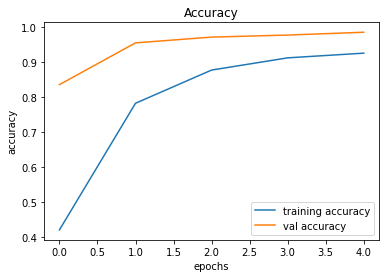

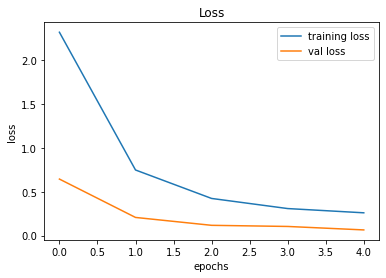

In [7]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [10]:
# Testing the model

from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
img_paths = y_test["Path"].values

test_data = []
img = 1
for path in img_paths:
    image = Image.open(path)
    img = image
    image = image.resize((30, 30))
    test_data.append(np.array(image))

test_data = np.array(test_data)
pred = model.predict_classes(test_data)

# Accuracy with the best data

from sklearn.metrics import accuracy_score

accuracy_score(labels, pred)

0.9478226444972289

In [17]:
model = tf.keras.models.load_model('traffic_recognition.h5')
tf.saved_model.save(model, 'mobile_recognition.pb')

converter = tf.lite.TFLiteConverter.from_saved_model('mobile_recognition.pb')
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

NameError: name 'tf' is not defined

In [16]:
from PIL import Image
img.show()
pre = model.predict_classes(img)

NameError: name 'model' is not defined